In [ ]:
# instalações
!pip install sweetviz

In [ ]:
# importação das bibliotecas. Com o botão direito, escolha 'format cell' para por os imports em ordem alfabetica
import platform
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sweetviz as sv

In [31]:
# checando versões

print("Operating system:", platform.system(), platform.release())
print("Python version:", sys.version)
print("Numpy version:", np.version.version)
print("Pandas version:", pd.__version__)
print("Seaborn version:", sns.__version__)

Operating system: Linux 5.4.117-58.216.amzn2.x86_64
Python version: 3.9.7 | packaged by conda-forge | (default, Sep 29 2021, 19:20:46) 
[GCC 9.4.0]
Numpy version: 1.20.3
Pandas version: 1.3.3
Seaborn version: 0.11.2


In [21]:
# configurando plotagem
sns.set() # set o theme para os plots
%config InlineBackend.figure_format = 'retina' # Makes the images more clear

In [33]:
# importando csv e transformando em Dataframe
df = pd.read_csv('Billionaire.csv')
display("Pequena amostra para checar como é a tabela", df.head())
display("Informações sobre a tabela", df.info())

'Pequena amostra para checar como é a tabela'

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2755 entries, 0 to 2754
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      2755 non-null   object 
 1   NetWorth  2755 non-null   object 
 2   Country   2755 non-null   object 
 3   Source    2755 non-null   object 
 4   Rank      2755 non-null   int64  
 5   Age       2676 non-null   float64
 6   Industry  2755 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 150.8+ KB


'Informações sobre a tabela'

None

In [ ]:
# EDA rápido com sweetviz
my_report = sv.analyze(df)
my_report.show_html(
    filepath="EDA - Bilionaries.html",
    open_browser=False,
    layout="widescreen",
    scale=None,
)

In [7]:
# neste caso, iremos remover dos mais de 2000 registros, aqueles c algum valor faltante para idede (79)
df = df.dropna()

In [12]:
# retirando os caracteres especiais da coluna NetWorth e transformando em float
df["NetWorth"] = df["NetWorth"].str.strip("$")
df["NetWorth"] = df["NetWorth"].str.strip("B")
df["NetWorth"] = df["NetWorth"].astype(float)

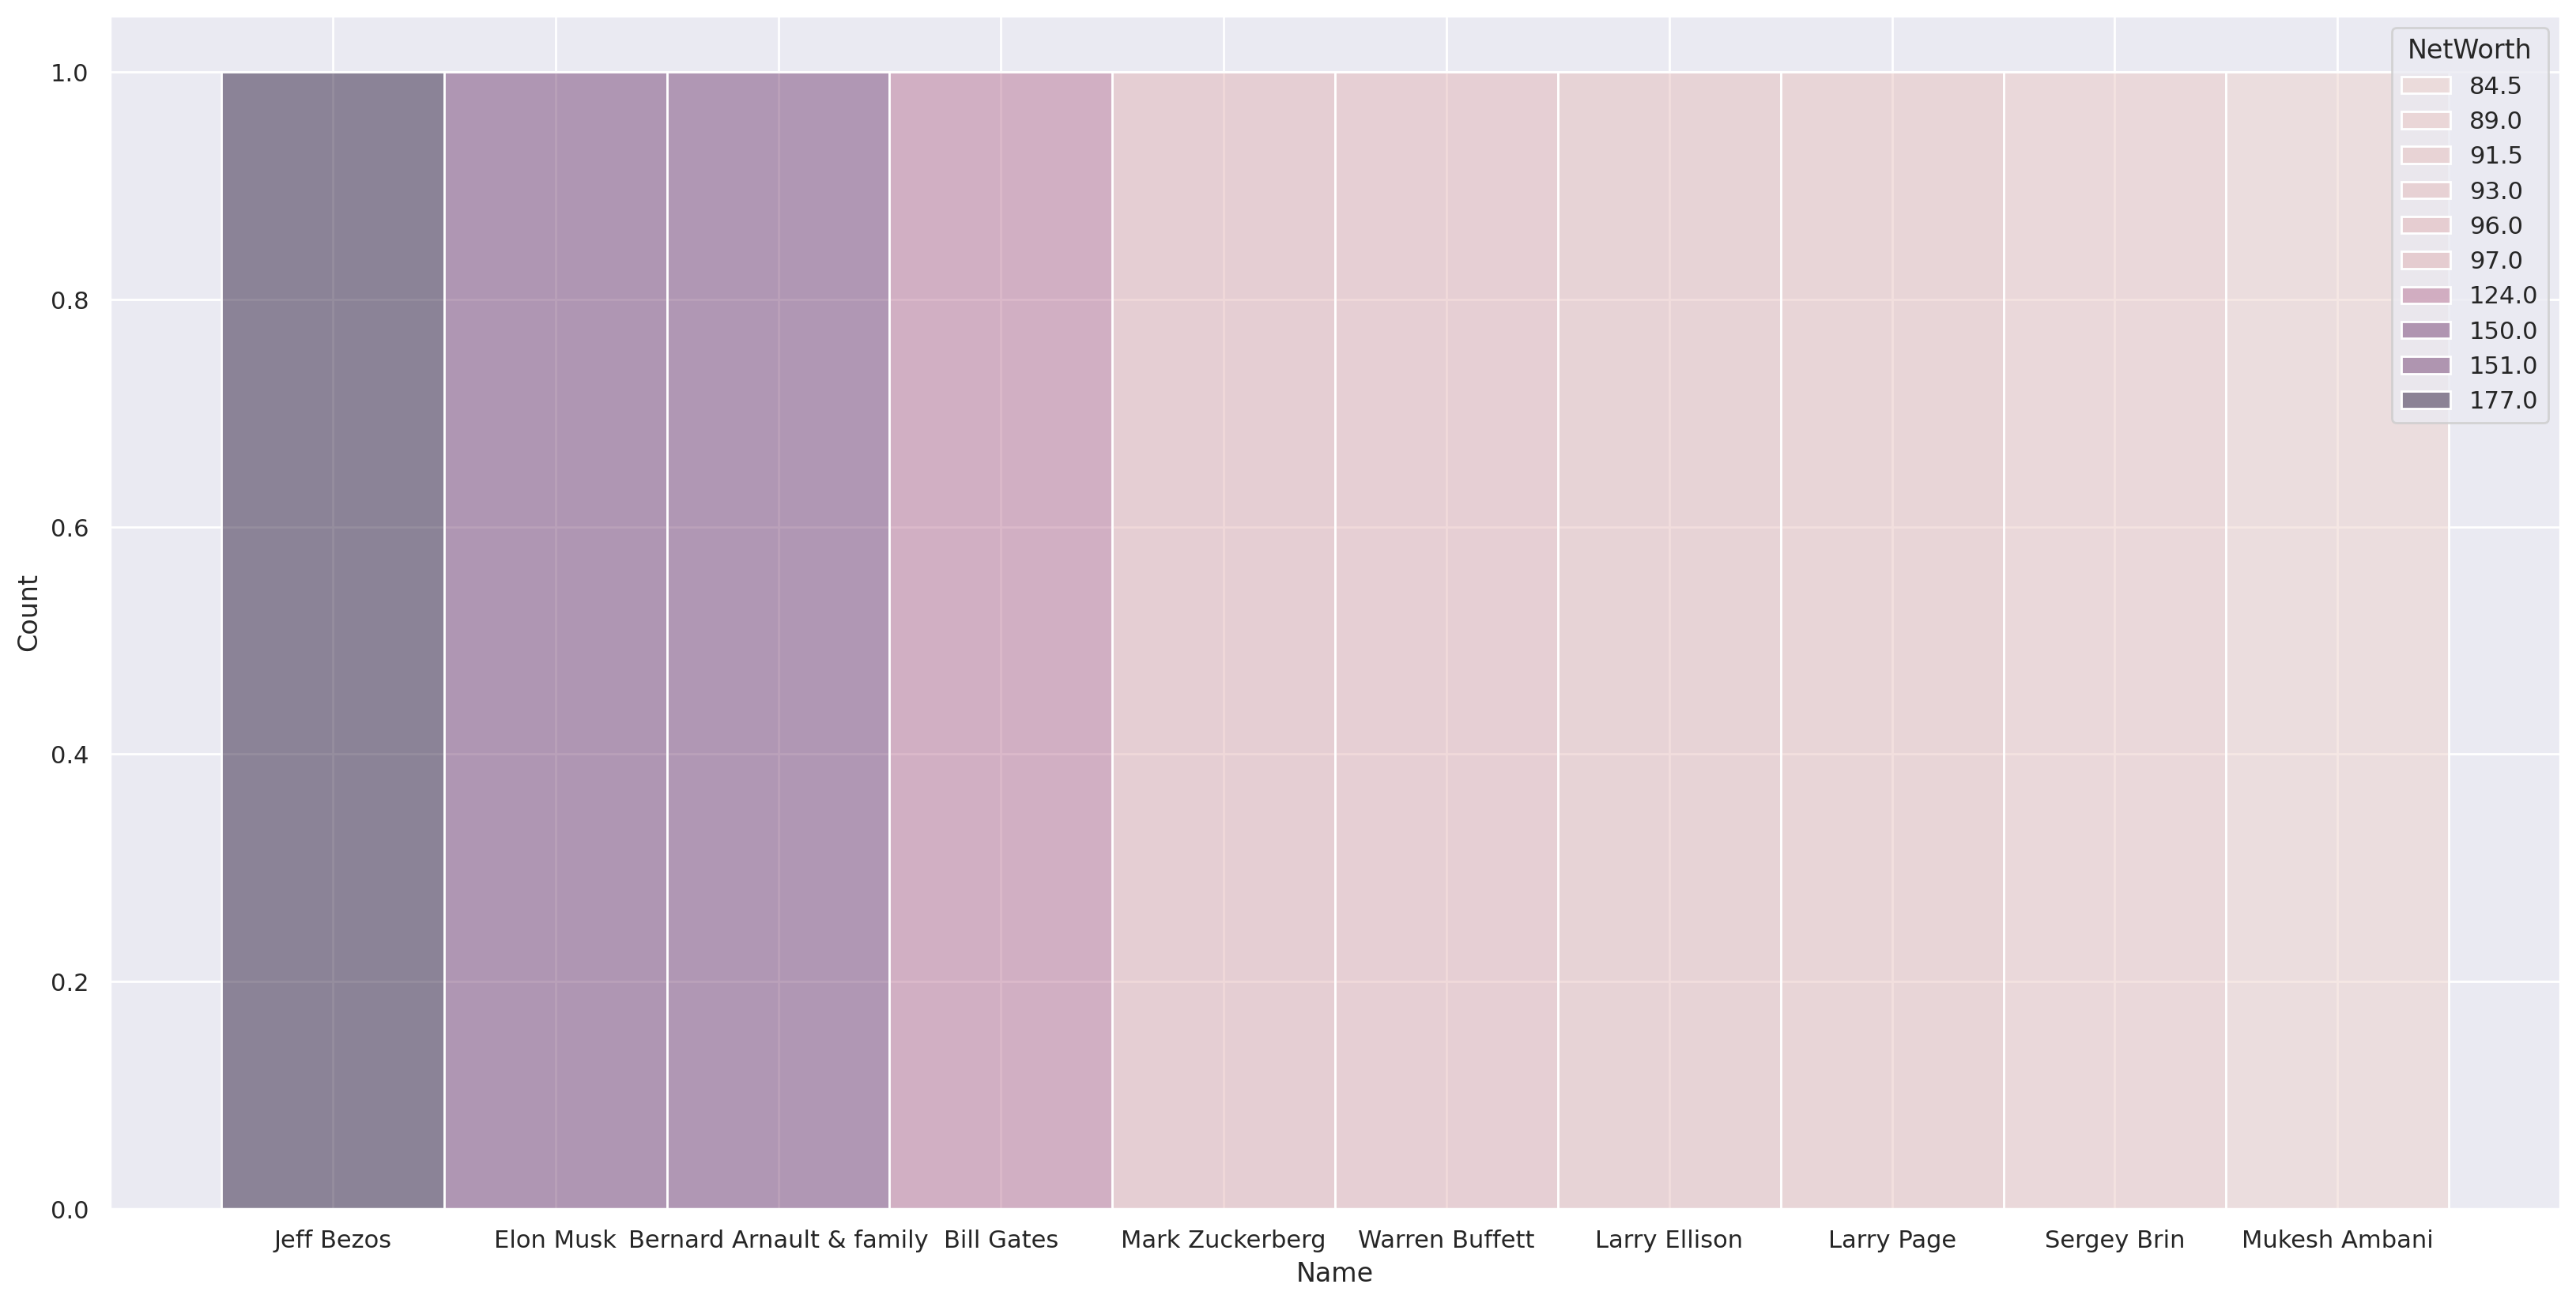

In [22]:
# Top 10 bilionaries de acordo com NetWorth
# num novo dataframe, ordena de modo descendente pela variavel NetWorth, e seleciona apenas os 1o primeiros
topWorth = df.sort_values(by = ["NetWorth"], ascending=False).head(10) 
# plota um histograma
plt.figure(figsize=(20, 10))
sns.histplot(x="Name", hue="NetWorth", data=topWorth)
plt.show()

In [ ]:
# Agora vamos olhar para os top 5 dominios q contem o maior nr de bilionários